In [80]:
import os 
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt

In [81]:
import warnings
warnings.filterwarnings('ignore')

# Reading 

In [82]:
def read_report_classification(report_path, num_epochs, mode):
    
    df = None 

    for epoch in range(num_epochs):
        report_name = f"{mode}_{epoch}.csv"
        df_epoch = pd.read_csv(os.path.join(report_path, report_name))
        
        if df is None:
            df = df_epoch
        else:
            df = pd.concat([df, df_epoch])
            
    df.drop(columns=["Unnamed: 0"], inplace=True)
            
    return df

# All Rotation

In [5]:
experiment_type="not_all"
layer=1

report_path = f"../reports/reports_{experiment_type}" 

train = read_report_classification(
                                    report_path=report_path,
                                    num_epochs=20, 
                                    mode="train"
                                    )

## Loss Function

In [42]:
def plot_epoch(
    df,
    df_label,
    ylabel,
    ylim,
    yticks,
    title,
    save_path,
    figsize=(15,12),
    legend=True,
    num_epochs=100,
    convergence_mode="min",
    convergence_text=dict()
    ):
    min_val = df.min().item()
    max_val = df.max().item()

    ax = plt.gca()

    df.rename(columns={df_label[0]:df_label[1]}).plot(figsize=figsize, linewidth=3, color="#B20600", zorder=5, ax=ax)
    
    if convergence_mode=="min":
        plt.plot(np.arange(0,num_epochs, 1),[min_val]*num_epochs, "--", color="#00092C", zorder=5)
    elif convergence_mode=="max":
        plt.plot(np.arange(0,num_epochs, 1),[max_val]*num_epochs, "--", color="#00092C", zorder=5)



    ax.spines["top"].set_visible(False)
    ax.spines["right"].set_visible(False)

    if len(convergence_text.keys()):
        convergence_val = min_val
        if convergence_mode=="max":
            convergence_val = max_val
        ax.text(convergence_text["x"], convergence_text["y"], "{:.3f}".format(convergence_val), fontsize=15, color="#00092C")


    plt.xlim([0,num_epochs])
    plt.ylim(ylim)

    if not legend:
        ax.get_legend().remove()
    else:
        plt.legend(fontsize=25)
        

    plt.xticks(np.arange(0,num_epochs+1,2), fontsize=20)
    plt.yticks(yticks, fontsize=20)

    plt.xlabel("Epoch", fontsize=25)
    plt.ylabel(ylabel, fontsize=25)

    plt.grid(alpha=0.3, zorder=0)

    plt.title(title, fontsize=30)

    plt.savefig(save_path)
    plt.show()

In [43]:
train_loss = train[["epoch","loss"]].groupby(by="epoch")

train_loss = train_loss.sum() / train_loss.count()

In [44]:
min_loss_train = train_loss.min().item()
max_loss_train = train_loss.max().item()

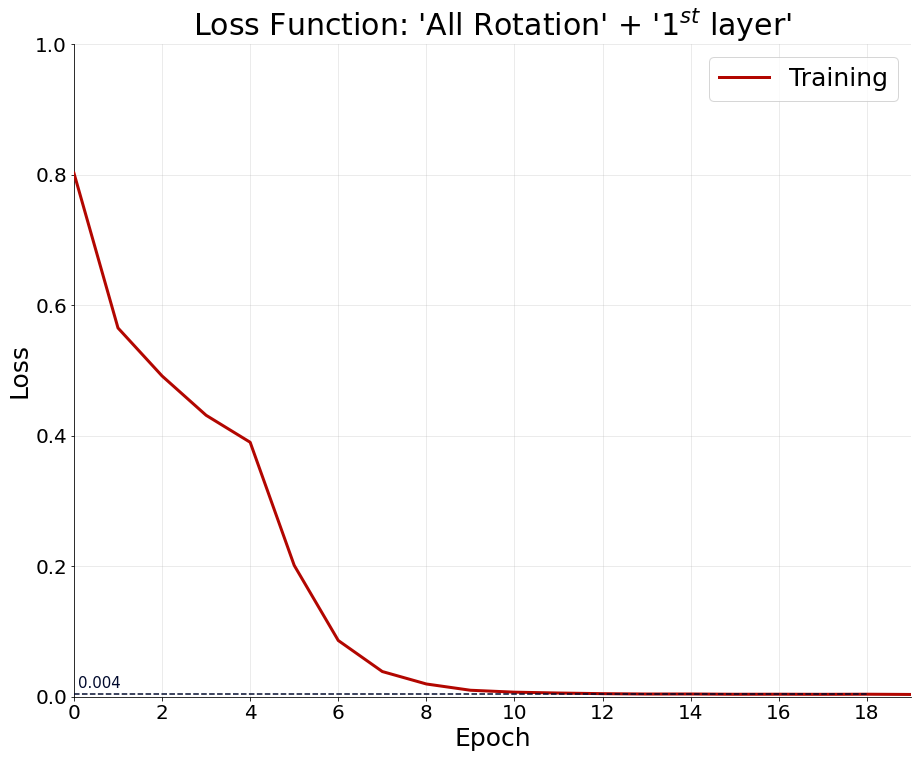

In [50]:
plot_epoch(
    df=train_loss,
    df_label=["loss", "Training"],
    figsize=(15,12),
    num_epochs=19,
    ylabel="Loss",
    ylim=[0, int(max_loss_train)+1],
    yticks=np.arange(0,int(max_loss_train)+1.1,0.2),
    legend=True,
    title="Loss Function: 'All Rotation' + '$%d^{st}$ layer'" % layer,
    save_path=f"../plots/resnet34/loss_{experiment_type}_{layer}.png",
    convergence_mode="min",
    convergence_text={
    "x": 0.1,
    "y": min_loss_train+0.01,
    }
)

## Accuracy (Top-1)

In [51]:
train_acc1 = train[["epoch","acc1"]].groupby(by="epoch")

train_acc1 = train_acc1.sum() / train_acc1.count()

In [53]:
min_acc1_train = train_acc1.min().item()
max_acc1_train = train_acc1.max().item()

min_val = min_acc1_train
max_val = max_acc1_train

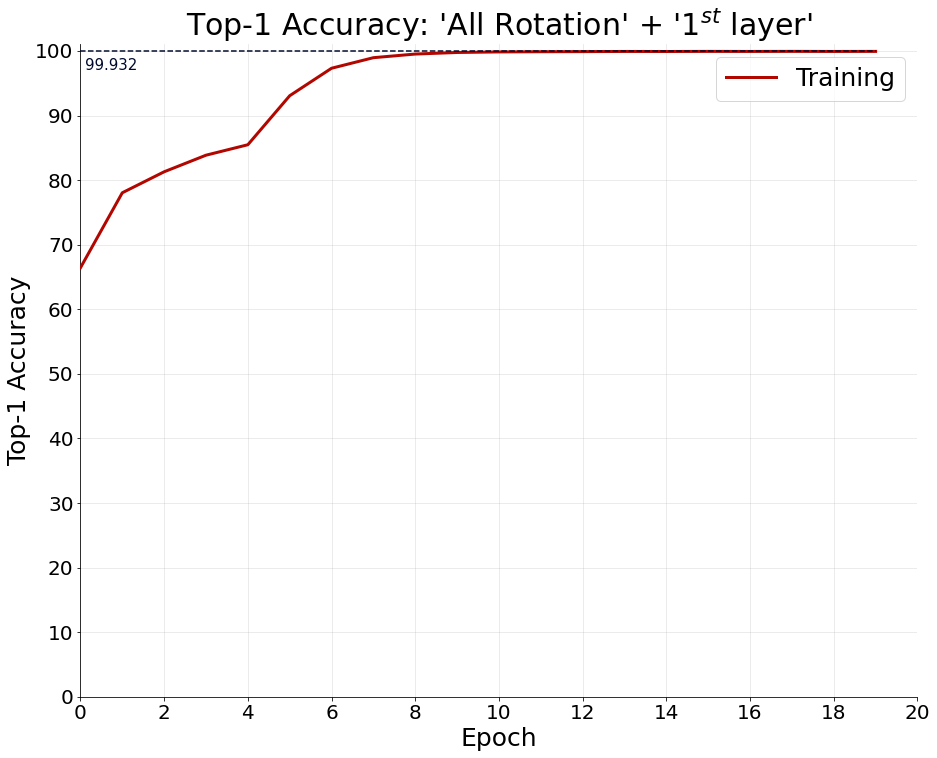

In [60]:
max_val = 100

plot_epoch(
    df=train_acc1,
    df_label=["acc1", "Training"],
    figsize=(15,12),
    num_epochs=20,
    ylabel="Top-1 Accuracy",
    ylim=[0, int(max_val)+1],
    yticks=np.arange(0,int(max_val)+.1,10),
    legend=True,
    title="Top-1 Accuracy: 'All Rotation' + '$%d^{st}$ layer'" % layer,
    save_path=f"../plots/resnet34/top1_{experiment_type}_{layer}.png",
    convergence_mode="max",
    convergence_text={
    "x": 0.1,
    "y": max_val-3,
    }
)

## Accuracy (Top-5)

In [61]:
train_acc2 = train[["epoch","acc2"]].groupby(by="epoch")

train_acc2 = train_acc2.sum() / train_acc2.count()

In [62]:
min_acc2_train = train_acc2.min().item()
max_acc2_train = train_acc2.max().item()

min_val = min_acc2_train
max_val = max_acc2_train

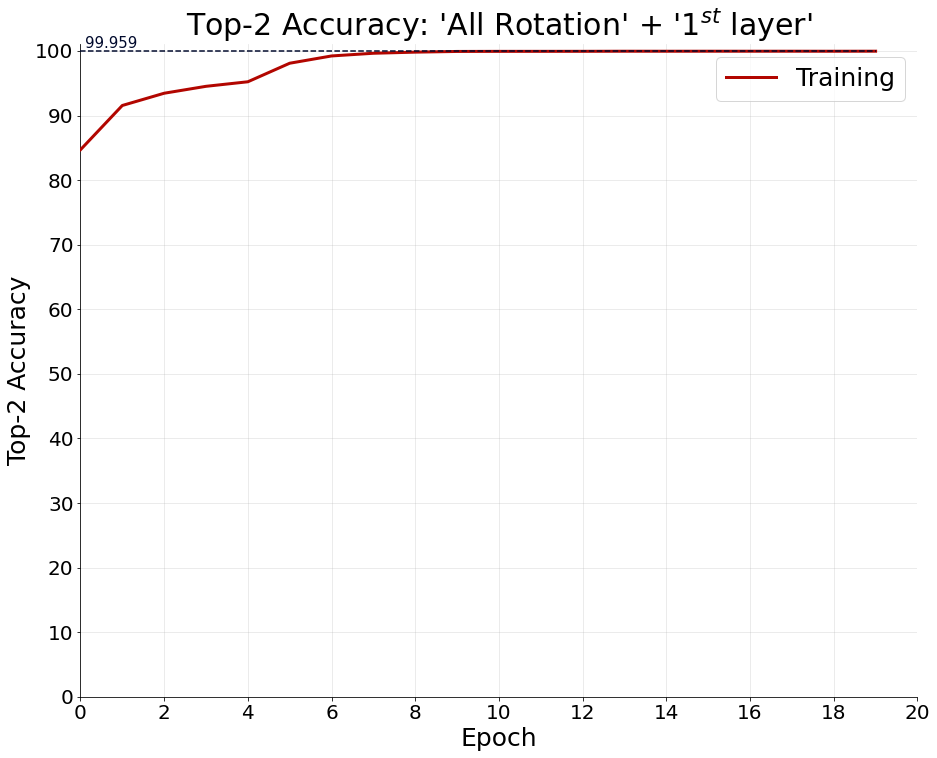

In [68]:
max_val=100

plot_epoch(
    df=train_acc2,
    df_label=["acc2", "Training"],
    figsize=(15,12),
    num_epochs=20,
    ylabel="Top-2 Accuracy",
    ylim=[0, int(max_val)+1],
    yticks=np.arange(0,int(max_val)+.1,10),
    legend=True,
    title="Top-2 Accuracy: 'All Rotation' + '$%d^{st}$ layer'" % layer,
    save_path=f"../plots/resnet34/top2_{experiment_type}_{layer}.png",
    convergence_mode="max",
    convergence_text={
    "x": 0.1,
    "y": max_val+0.5,
    }
)

## Learning Rate

In [78]:
def plot_lr(
    df,
    title,
    save_path
):
    
    df_lr = df[["epoch", "batch_id","lr"]]
    
    iteration_per_epoch = df_lr[["epoch", "batch_id"]].groupby(by="epoch").count()["batch_id"].unique().item()
    
    df_lr = df_lr[["epoch", "batch_id","lr"]]
    df_lr["Iteration"] = df_lr["epoch"] * iteration_per_epoch + df_lr["batch_id"]
    df_lr.rename(columns={"lr": "Learning Rate"}, inplace=True)
    
    min_lr = df_lr["Learning Rate"].min()
    max_lr = df_lr["Learning Rate"].max()
    
    max_it = df_lr["Iteration"].max()

    num_iterations = df_lr["Iteration"].max() - df_lr["Iteration"].min()
    num_iterations = num_iterations.item()
    
    ax = plt.gca()

    df_lr.plot(x="Iteration", y="Learning Rate", figsize=(15,10), linewidth=3, ax=ax, zorder=5, color="#00092C")


    ax.spines["top"].set_visible(False)
    ax.spines["right"].set_visible(False)

    plt.xlabel("Iteration", fontsize=25)
    plt.ylabel("Learning Rate", fontsize=25)

    plt.xlim([0, max_it])
    plt.ylim([0, max_lr+ 1e-4])

    plt.xticks(np.arange(0, num_iterations, 100), fontsize=20)
    plt.yticks(np.arange(0, max_lr+1e-4, 1e-4), fontsize=20)
    plt.ticklabel_format(axis="y", style="sci", scilimits=(0,0))

    plt.grid(alpha=0.3, zorder=0)

    ax.get_legend().remove()

    plt.title(title, fontsize=30)

    plt.savefig(save_path)
    plt.show()

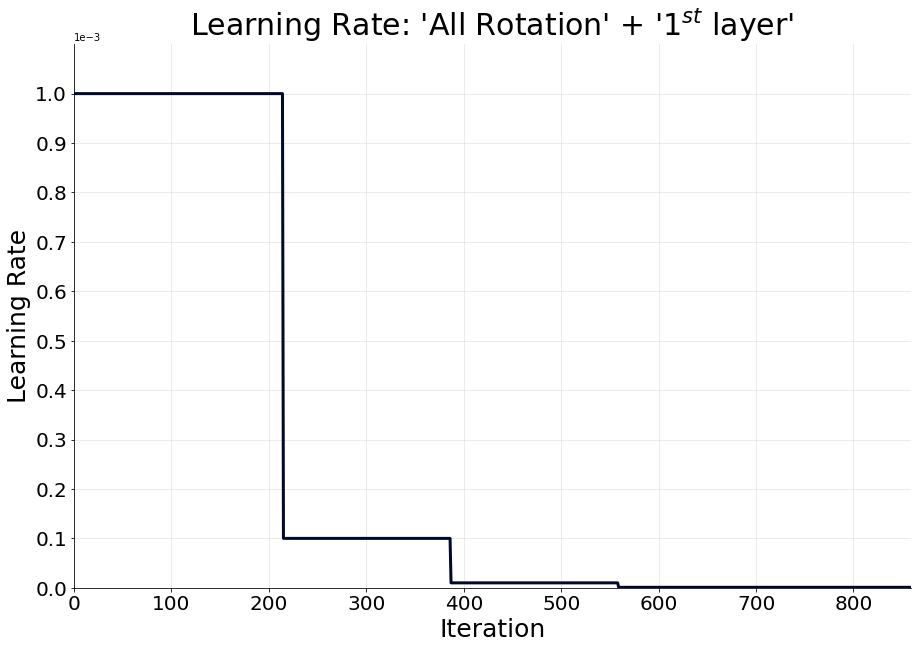

In [79]:
plot_lr(
    train,
    title="Learning Rate: 'All Rotation' + '$%d^{st}$ layer'" % layer,
    save_path=f"../plots/resnet34/lr_{experiment_type}_{layer}.png",
)